In [1]:
# /// script
# requires-python = ">=3.10"
# dependencies = [
#     "imageio[tifffile]",
#     "scenex[jupyter,pygfx]",
# ]
# ///

In [2]:
import scenex as snx
import numpy as np
import cmap

image = snx.Image(
    data=np.random.randint(0, 255, (200, 200)).astype(np.uint8),
    cmap=cmap.Colormap("viridis"),
    transform=snx.Transform().scaled((1.3, 0.5)).translated((-40, 20)),
    clims=(0, 255),
    opacity=0.7,
    interactive=True,
)
points = snx.Points(
    coords=np.random.randint(0, 200, (100, 2)).astype(np.uint8),
    size=5,
    face_color=cmap.Color("coral"),
    edge_color=cmap.Color("purple"),
    transform=snx.Transform().translated((0, -50)),
    interactive=True,
)

view = snx.View(
    blending="default",
    scene=snx.Scene(
        children=[image, points]
    ),
)

canvas = snx.show(view)
snx.run()

'Using RemoteFrameBuffer widget'

RFBOutputContext()

'Using Jupyter Event Filter'

JupyterRenderCanvas(css_height='500.0px', css_width='500.0px')
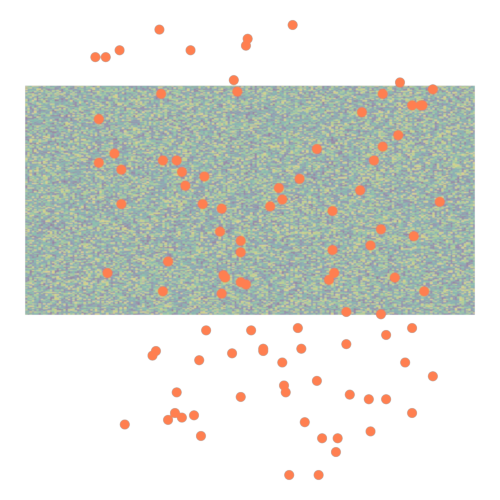

In [3]:
canvas._get_native()

In [8]:
from IPython.display import display
import random

random.seed(0xdeadbeef)
colors = ["blue", "red", "yellow", "green"]

def foo(event, node) -> bool:
    if isinstance(node, snx.Points):
        node.face_color = colors[random.randint(0, len(colors) - 1)]
    return False

view.scene.children[1].set_event_filter(foo)

<function __main__.foo(event, node) -> bool>